# Comportamento Dinâmico de Sistemas de Medição

<hr style="border:2px solid gray"> </hr>

## Instrumentos Medidores de Ordem Zero

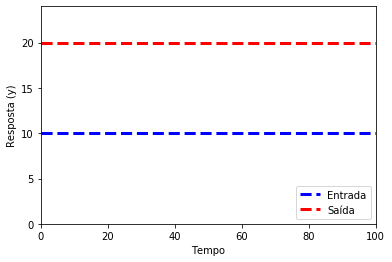

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# y = K*x
K = 2 # Ganho
AmpEnt = 10; #Amplitude da entrada aplicada


x = AmpEnt*np.ones(100) # Vetor de entrada aplicada ao sistema
y = K*x # Saída obtida
t = np.linspace(0,100,100)


plt.figure(1)
plt.plot(t,x,'b--',linewidth=3,label='Entrada')
plt.plot(t,y,'r--',linewidth=3,label='Saída')
plt.xlim(0, 100)
plt.ylim(0, 1.2*AmpEnt*K)
plt.xlabel('Tempo')
plt.ylabel('Resposta (y)')
plt.legend(loc='lower right')
plt.show()


<hr style="border:2px solid gray"> </hr>

## Dinâmica de Primeira Ordem

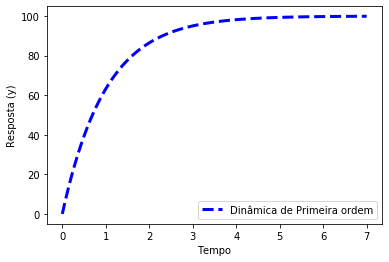

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# H(s) = K/tau*s + 1
K = 100 # Ganho
tau = 1.0 # Constante de tempo

AmpEnt = 1; #Amplitude da entrada aplicada

num = [K] # Define o numerador da FT
den = [tau,1] # Define o denominador da FT
sis = signal.TransferFunction(num,den) # Define a FT.
t1,y1 = signal.step(sis) # Aplica um degrau unitário à FT.

plt.figure(1)
plt.plot(t1,AmpEnt*y1,'b--',linewidth=3,label='Dinâmica de Primeira ordem')
plt.xlabel('Tempo')
plt.ylabel('Resposta (y)')
plt.legend(loc='best')
plt.show()

<hr style="border:2px solid gray"> </hr>

## Dinâmica de Segunda Ordem

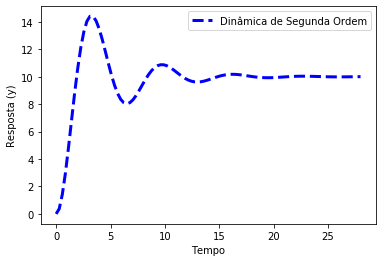

In [14]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# H(s) = K*(wn^2)/(s^2 + 2*xi*wn*s + wn^2)
K = 1       # Ganho 
xi = 0.25   # Coeficiente de amortecimento
wn = 1     # Frequência natural do sistema.

#Amplitude da entrada aplicada
AmpEnt = 10;

num = [K*wn**2] # Define o numerador da FT
den = [1,2*xi*wn,wn**2] # Define o denominador da FT
sys1 = signal.TransferFunction(num,den) # Define a FT
t1,y1 = signal.step(sys1) # Aplica um degrau unitário

plt.figure(1)
plt.plot(t1,y1*AmpEnt,'b--',linewidth=3,label='Dinâmica de Segunda Ordem')
plt.xlabel('Tempo')
plt.ylabel('Resposta (y)')
plt.legend(loc='best')
plt.show()

<hr style="border:2px solid gray"> </hr>

## Atraso puro de tempo + dinâmica de primeira ordem

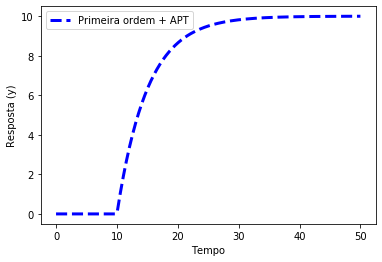

In [15]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulação de primeira ordem + atraso puro de tempo
def foptd(t, K=1, tau=1, tau_d=0):
    tau_d = max(0,tau_d)
    tau = max(0,tau)
    return np.array([K*(1-np.exp(-(t-tau_d)/tau)) if t >= tau_d else 0 for t in t])

t = np.linspace(0,50,200)
tau = 5
tau_delay = 10
K = 10

y = foptd(t,K,tau,tau_delay)
plt.figure(1)
plt.plot(t,y,'b--',linewidth=3,label='Primeira ordem + APT')
plt.xlabel('Tempo')
plt.ylabel('Resposta (y)')
plt.legend(loc='best')
plt.show()

## Dinâmica de segunda ordem aproximada por primeira ordem + APT

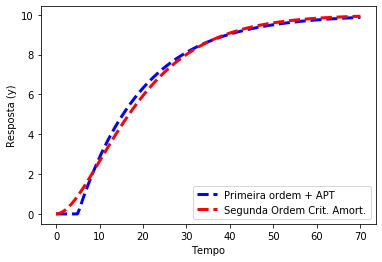

In [16]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulação de primeira ordem + atraso puro de tempo
def foptd(t, K=1, tau=1, tau_d=0):
    tau_d = max(0,tau_d)
    tau = max(0,tau)
    return np.array([K*(1-np.exp(-(t-tau_d)/tau)) if t >= tau_d else 0 for t in t])

t = np.linspace(0,70,200)
tau = 15
tau_delay = 5
K = 10

y = foptd(t,K,tau,tau_delay)



# Dinâmica de segunda ordem
# H(s) = K*(wn^2)/(s^2 + 2*xi*wn + wn^2)
# O ganho usado será o mesmo do caso anterior.
tau = 1.0   # Constante de tempo
xi = 1   # Coeficiente de amortecimento
wn = 0.1

num = [K*wn**2] # Define o numerador da FT
den = [1,2*xi*wn,wn**2] # Define o denominador da FT
sys1 = signal.TransferFunction(num,den) # Define a FT
t1,y1 = signal.step(sys1) # Aplica um degrau unitário

plt.figure(1)
plt.plot(t,y,'b--',linewidth=3,label='Primeira ordem + APT')
plt.plot(t1,y1,'r--',linewidth=3,label='Segunda Ordem Crit. Amort.')
plt.xlabel('Tempo')
plt.ylabel('Resposta (y)')
plt.legend(loc='best')
plt.show()